### Nesse capítulo vamos ver como otimizar os hiperparâmetros de um modelo de classificação usando as duas técnicas mais famosas:
1. ### Grid Search
2. ### Random Search

### Todo modelo de machine learning têm seus hiperparâmetros pré-especificados antes do treinamento.
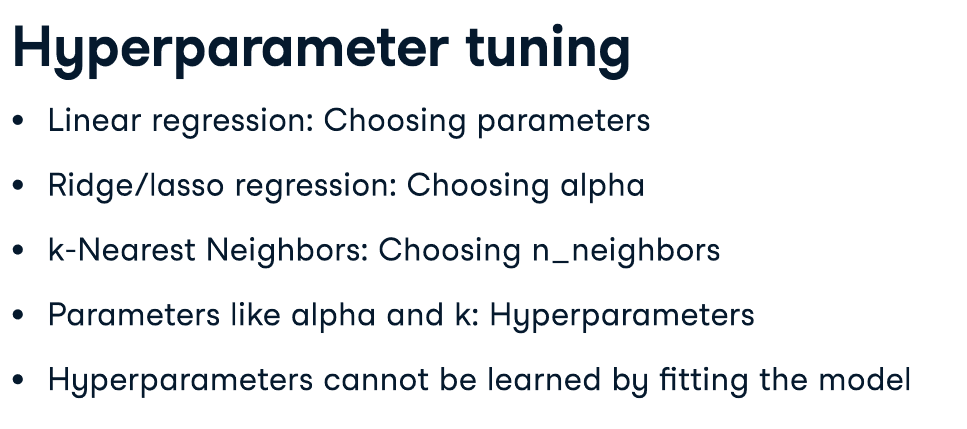

### A técnica GridSearch se baseia em testar todas as combinações de hiperparâmetros pré-específicados e ver qual combinação de hiperparâmetros obtem o maior score de interesse na validação cruzada.
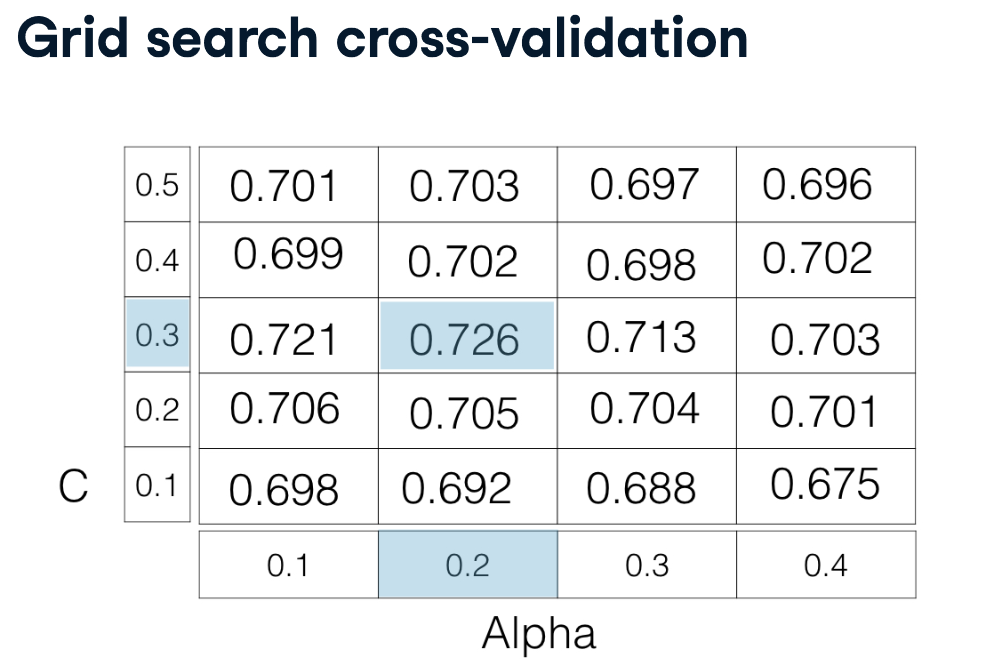

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier

In [2]:
dados=pd.read_csv("dados//diabetes.csv")

In [3]:
dados.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X=dados.drop(["diabetes"], axis=1)
y=dados["diabetes"]

In [7]:
param_grid = {'n_neighbors': np.arange(1, 50)}

In [10]:
knn = KNeighborsClassifier()

In [14]:
knn_cv = GridSearchCV(knn, param_grid, cv=5, scoring="precision")

In [15]:
knn_cv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             scoring='precision')

In [16]:
knn_cv.best_params_

{'n_neighbors': 34}

In [17]:
knn_cv.best_score_

0.7445822994210092

### A técnica de Random Search é muito parecida, porém fornecemos possíveis hiperparâmetros e um número de iterações para a escolha aleatória entre os hiperparâmetros possíveis.

In [22]:
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

In [23]:
# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

In [24]:
# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5, n_iter=15, scoring="precision")

In [25]:
# Fit it to the data
tree_cv.fit(X, y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=15,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DE2FDC1190>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DE2FE0C190>},
                   scoring='precision')

In [26]:
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 8, 'min_samples_leaf': 7}


In [27]:
print("Best score is {}".format(tree_cv.best_score_))

Best score is 0.66843258891646


### Um detalha muito importante para otimizar os hiperparâmetros é não usar todo os dados para a otimização, devemos usar os dados de treino para a Validação Cruzada e depois verificamos o score de interesse no conjunto de teste com o modelo com os hiperparâmetros  escolhidos na otimização!
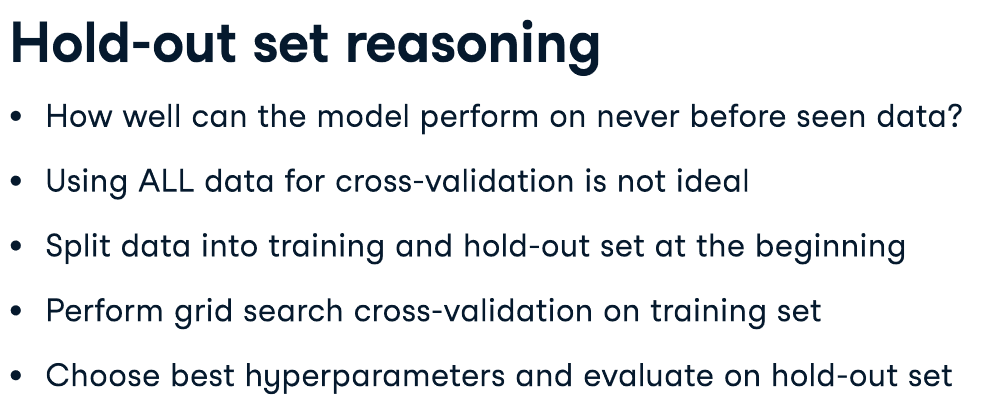